In [1]:
import pandas as pd
import numpy as np

print("Meow! Kitty’s lab is working perfectly 😸")
print("Pandas version:", pd.__version__)
print("Numpy version:", np.__version__)


Meow! Kitty’s lab is working perfectly 😸
Pandas version: 2.3.3
Numpy version: 2.3.4


In [2]:
import pandas as pd

# Load our sample data
df = pd.read_csv("../data/sample_responses.csv")

# Display the first few rows
df.head()


,student,answer
0,Alice,The mitochondria is the powerhouse of the cell.
1,Bob,ChatGPT wrote this answer about machine learni...
2,Carol,I think the lecture explained well how AI help...


In [3]:
import pandas as pd

# Load our sample data
df = pd.read_csv("../data/sample_responses.csv")

# 1️⃣ See basic info
print("Number of responses:", len(df))
print("\nSample:")
print(df.head(), "\n")

# 2️⃣ Measure basic features about each answer
df["word_count"] = df["answer"].apply(lambda x: len(x.split()))
df["avg_word_length"] = df["answer"].apply(lambda x: sum(len(w) for w in x.split()) / len(x.split()))
df["punctuation_count"] = df["answer"].apply(lambda x: sum(1 for ch in x if ch in ".,!?;:"))

# 3️⃣ Display results
df[["student", "word_count", "avg_word_length", "punctuation_count"]]


Number of responses: 3

Sample:
  student                                             answer
0   Alice    The mitochondria is the powerhouse of the cell.
1     Bob  ChatGPT wrote this answer about machine learni...
2   Carol  I think the lecture explained well how AI help... 



,student,word_count,avg_word_length,punctuation_count
0,Alice,8,5.000000,1
1,Bob,11,6.090909,1
2,Carol,12,4.916667,1


In [4]:
# Make sure Python can find the src/ folder, then run detection
import sys, os
sys.path.append(os.path.abspath(".."))   # add project root to Python path

from src.ai_detect import detect   # import your detector
import pandas as pd

# load data and compute scores
df = pd.read_csv("../data/sample_responses.csv")
df["_ai_score"] = df["answer"].apply(lambda t: detect(t)["score"])

# show results sorted by score (highest first)
df_sorted = df.sort_values("_ai_score", ascending=False)
display(df_sorted[["student", "answer", "_ai_score"]])


,student,answer,_ai_score
1,Bob,ChatGPT wrote this answer about machine learni...,0.382580
0,Alice,The mitochondria is the powerhouse of the cell.,0.360622
2,Carol,I think the lecture explained well how AI help...,0.319725


In [5]:
# use our detector
from src.ai_detect import detect
import pandas as pd

df = pd.read_csv("../data/sample_responses.csv")

# compute scores
df["_ai_score"] = df["answer"].apply(lambda t: detect(t)["score"])

# show results sorted by score (highest first)
df_sorted = df.sort_values("_ai_score", ascending=False)
df_sorted[["student", "answer", "_ai_score"]]



,student,answer,_ai_score
1,Bob,ChatGPT wrote this answer about machine learni...,0.382580
0,Alice,The mitochondria is the powerhouse of the cell.,0.360622
2,Carol,I think the lecture explained well how AI help...,0.319725


In [6]:
import sys, os
sys.path.append(os.path.abspath(".."))
# use our detector
from src.ai_detect import detect
import pandas as pd

df = pd.read_csv("../data/sample_responses.csv")
    
# compute scores
df["_ai_score"] = df["answer"].apply(lambda t: detect(t)["score"])

# show results sorted by score (highest first)
df_sorted = df.sort_values("_ai_score", ascending=False)
df_sorted[["student", "answer", "_ai_score"]]

,student,answer,_ai_score
1,Bob,ChatGPT wrote this answer about machine learni...,0.382580
0,Alice,The mitochondria is the powerhouse of the cell.,0.360622
2,Carol,I think the lecture explained well how AI help...,0.319725


In [7]:
from src.ai_detect import detect
df["_ai_score"] = df["answer"].apply(lambda t: detect(t)["score"])
df.sort_values("_ai_score", ascending=False)[["student","answer","_ai_score"]]


,student,answer,_ai_score
1,Bob,ChatGPT wrote this answer about machine learni...,0.382580
0,Alice,The mitochondria is the powerhouse of the cell.,0.360622
2,Carol,I think the lecture explained well how AI help...,0.319725


In [8]:
# Add an explanation column for AI detection
def explain_score(score):
    if score >= 0.85:
        return "Very likely AI-generated"
    elif score >= 0.65:
        return "Possibly AI-assisted"
    elif score >= 0.45:
        return "Unclear / mixed "
    else:
        return "Likely human-written "

df["explanation"] = df["_ai_score"].apply(explain_score)

# Display the first few rows
df.head()


,student,answer,_ai_score,explanation
0,Alice,The mitochondria is the powerhouse of the cell.,0.360622,Likely human-written
1,Bob,ChatGPT wrote this answer about machine learni...,0.382580,Likely human-written
2,Carol,I think the lecture explained well how AI help...,0.319725,Likely human-written


In [9]:
# quick check
print("Columns in df:", df.columns.tolist())
display(df.head())

# create explanation using the existing _ai_score column
def explain_score_from_underscore(score):
    if score >= 0.85:
        return "Very likely AI-generated"
    elif score >= 0.65:
        return "Possibly AI-assisted"
    elif score >= 0.45:
        return "Unclear / mixed"
    else:
        return "Likely human-written"

# make sure the column exists, then apply
if "_ai_score" in df.columns:
    df["explanation"] = df["_ai_score"].apply(explain_score_from_underscore)
    print("Explanation column added from _ai_score.")
    display(df[["student","answer","_ai_score","explanation"]].head())
else:
    print("No column named '_ai_score' found. Run the detection cell first.")


Columns in df: ['student', 'answer', '_ai_score', 'explanation']


,student,answer,_ai_score,explanation
0,Alice,The mitochondria is the powerhouse of the cell.,0.360622,Likely human-written
1,Bob,ChatGPT wrote this answer about machine learni...,0.382580,Likely human-written
2,Carol,I think the lecture explained well how AI help...,0.319725,Likely human-written


Explanation column added from _ai_score.


,student,answer,_ai_score,explanation
0,Alice,The mitochondria is the powerhouse of the cell.,0.360622,Likely human-written
1,Bob,ChatGPT wrote this answer about machine learni...,0.382580,Likely human-written
2,Carol,I think the lecture explained well how AI help...,0.319725,Likely human-written


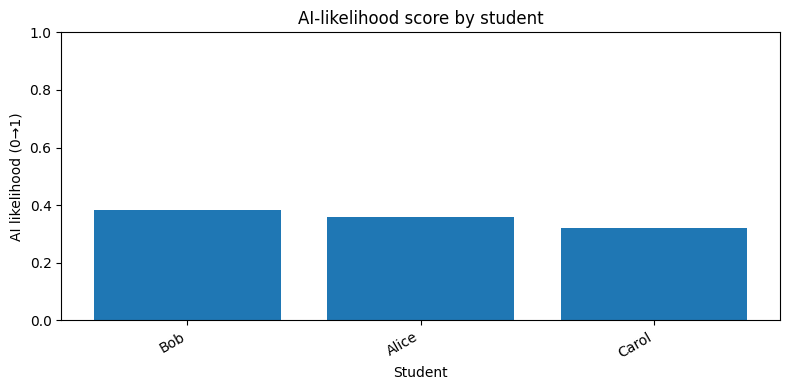

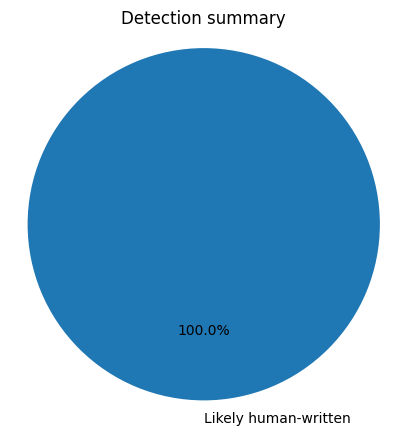

Saved: ../data/detected_results.csv and ../data/ai_scores_by_student.png


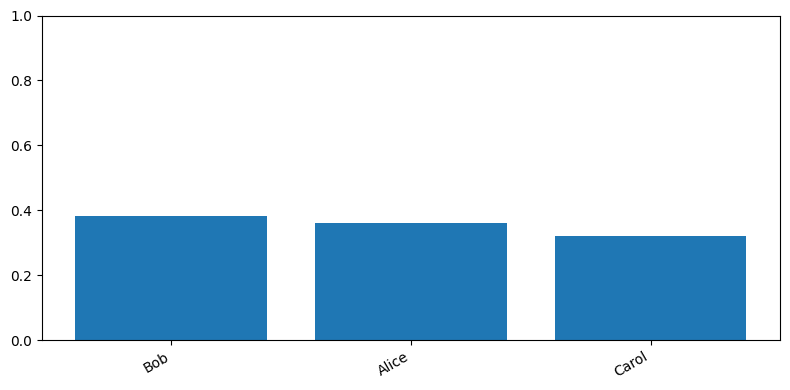

In [10]:
import matplotlib.pyplot as plt

# Bar chart: AI score per student
df_bar = df.sort_values("_ai_score", ascending=False).reset_index(drop=True)
plt.figure(figsize=(8,4))
plt.bar(df_bar["student"], df_bar["_ai_score"])
plt.ylim(0,1)
plt.xlabel("Student")
plt.ylabel("AI likelihood (0→1)")
plt.title("AI-likelihood score by student")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

# Pie chart: explanation distribution
plt.figure(figsize=(5,5))
counts = df["explanation"].value_counts()
plt.pie(counts.values, labels=counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Detection summary")
plt.axis("equal")
plt.show()

# Save bar chart image and annotated CSV
plt.figure(figsize=(8,4))
plt.bar(df_bar["student"], df_bar["_ai_score"])
plt.ylim(0,1)
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.savefig("../data/ai_scores_by_student.png")
df.to_csv("../data/detected_results.csv", index=False)
print("Saved: ../data/detected_results.csv and ../data/ai_scores_by_student.png")
